In [112]:
import pandas as pd
import numpy as np
import scipy


import matplotlib.pyplot as plt
import seaborn as sns



In [113]:
df = pd.read_excel("../data/Online Retail.xlsx")

In [114]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [115]:
# check null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [116]:
df.shape

(541909, 8)

In [117]:
len(df.Country.value_counts())

38

In [118]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [119]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [120]:
# Remove columns that are unrelated

df1 = df.copy()
df1.drop(['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'InvoiceDate'], axis=1, inplace=True)

In [121]:
df1.isna().any()

Quantity     False
UnitPrice    False
Country      False
dtype: bool

In [122]:
df1['TotalPrice'] = df1['Quantity'] * df1['UnitPrice']
df1.head()

,Quantity,UnitPrice,Country,TotalPrice
0,6,2.55,United Kingdom,15.30
1,6,3.39,United Kingdom,20.34
2,8,2.75,United Kingdom,22.00
3,6,3.39,United Kingdom,20.34
4,6,3.39,United Kingdom,20.34


In [123]:
# see how many different countries are there
len(df1['Country'].value_counts())

38

In [124]:
revenue = df1.groupby('Country')['TotalPrice'].sum().sort_index().reset_index()

In [125]:
type(revenue)

pandas.core.frame.DataFrame

Text(0.5, 1.0, 'Total Revenue by Country')

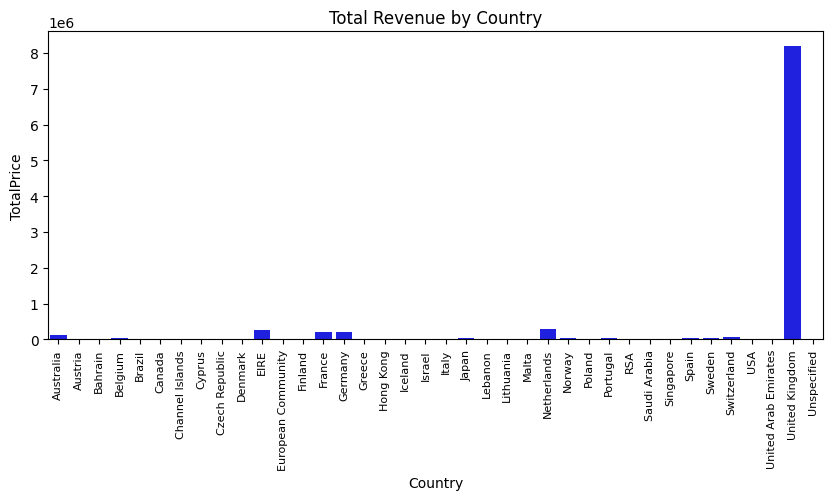

In [126]:
# Visualize in bar
plt.figure(figsize=(10, 4))
sns.barplot(x='Country', y='TotalPrice', data=revenue,color='b')
plt.xticks(rotation=90,fontsize=8)
plt.title("Total Revenue by Country")

In [127]:
# handle categrical column with one hot encoding
dum = pd.get_dummies(df1['Country'], dtype=int)

In [128]:
dum.sample(10)

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
381098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
78644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
407647,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
306500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
230379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
485848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
138280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
300854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
368280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
437847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [131]:
# let's merge and remove country column
final_df = pd.concat([df1, dum], axis=1)

In [132]:
final_df.head()

,Quantity,UnitPrice,Country,TotalPrice,Australia,Austria,Bahrain,Belgium,Brazil,Canada,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,6,2.55,United Kingdom,15.30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6,3.39,United Kingdom,20.34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8,2.75,United Kingdom,22.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,3.39,United Kingdom,20.34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,3.39,United Kingdom,20.34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [134]:
final_df.drop(['Country'], axis=1, inplace=True)

In [137]:
# let's see how column are related to each other

corr = final_df.corr()
corr

We can see there is more coorelation in quantity and the totalprice but not really between countries, that's why we are getting negative.

[Text(0.5, 0, 'Quantity'),
 Text(1.5, 0, 'UnitPrice'),
 Text(2.5, 0, 'TotalPrice'),
 Text(3.5, 0, 'Australia'),
 Text(4.5, 0, 'Austria'),
 Text(5.5, 0, 'Bahrain'),
 Text(6.5, 0, 'Belgium'),
 Text(7.5, 0, 'Brazil'),
 Text(8.5, 0, 'Canada'),
 Text(9.5, 0, 'Channel Islands'),
 Text(10.5, 0, 'Cyprus'),
 Text(11.5, 0, 'Czech Republic'),
 Text(12.5, 0, 'Denmark'),
 Text(13.5, 0, 'EIRE'),
 Text(14.5, 0, 'European Community'),
 Text(15.5, 0, 'Finland'),
 Text(16.5, 0, 'France'),
 Text(17.5, 0, 'Germany'),
 Text(18.5, 0, 'Greece'),
 Text(19.5, 0, 'Hong Kong'),
 Text(20.5, 0, 'Iceland'),
 Text(21.5, 0, 'Israel'),
 Text(22.5, 0, 'Italy'),
 Text(23.5, 0, 'Japan'),
 Text(24.5, 0, 'Lebanon'),
 Text(25.5, 0, 'Lithuania'),
 Text(26.5, 0, 'Malta'),
 Text(27.5, 0, 'Netherlands'),
 Text(28.5, 0, 'Norway'),
 Text(29.5, 0, 'Poland'),
 Text(30.5, 0, 'Portugal'),
 Text(31.5, 0, 'RSA'),
 Text(32.5, 0, 'Saudi Arabia'),
 Text(33.5, 0, 'Singapore'),
 Text(34.5, 0, 'Spain'),
 Text(35.5, 0, 'Sweden'),
 Text(36.5, 

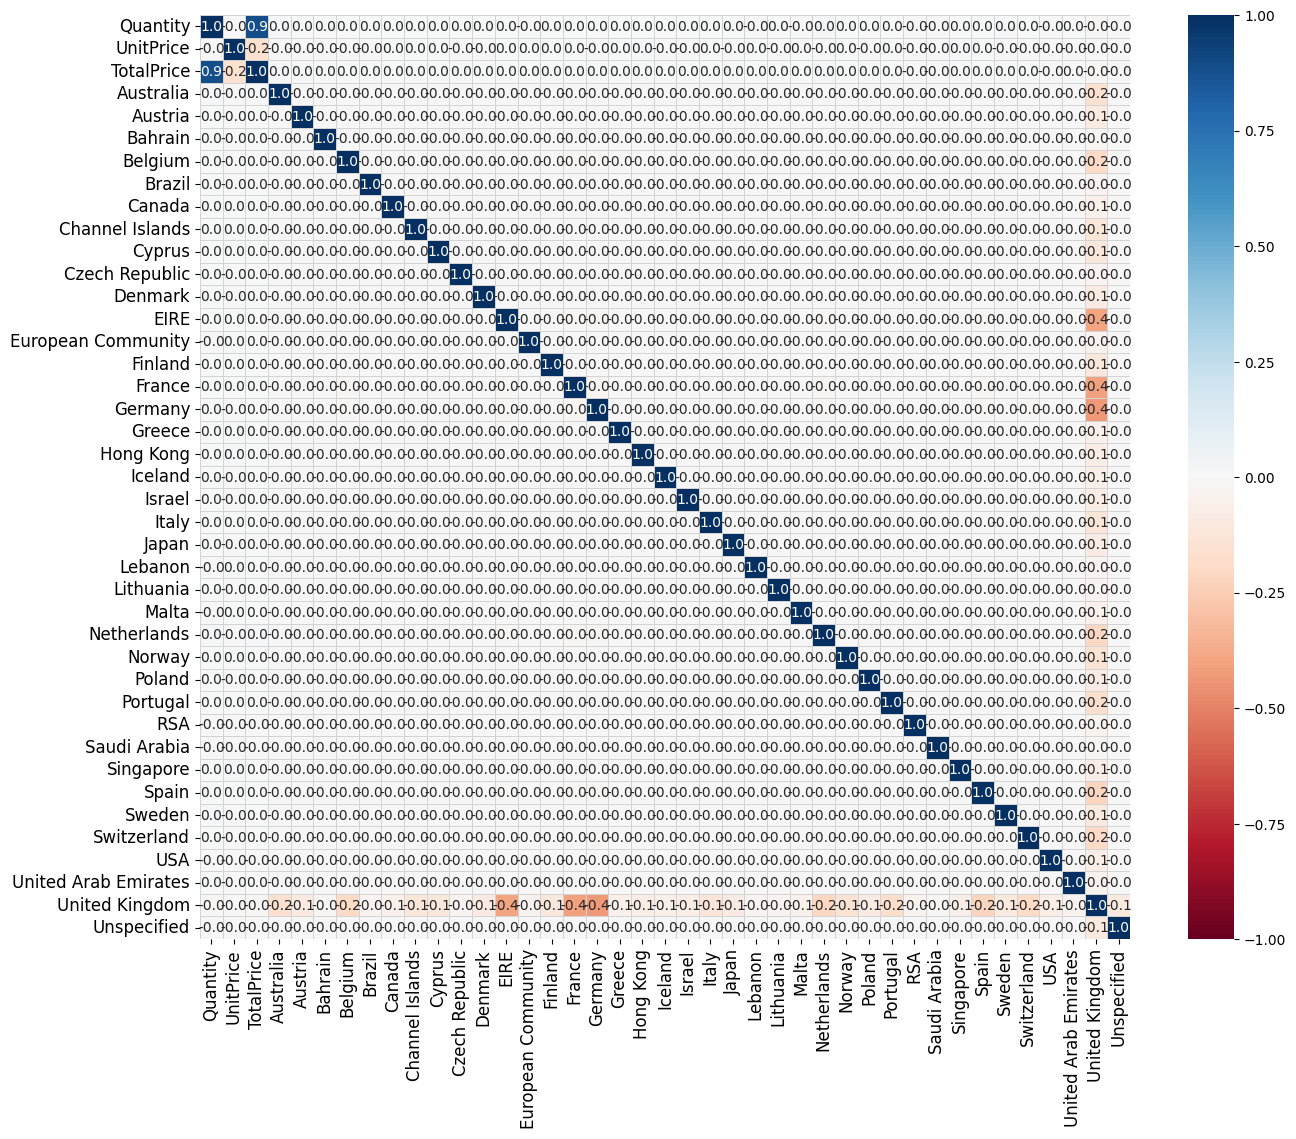

In [154]:
# Let's visualize to be more clear
plt.figure(figsize=(15,12))
s = sns.heatmap(corr, 
            annot=True,
            fmt=".1f",
            cmap='RdBu',
            vmin=-1,
            vmax=1,
            linewidths=0.5,
            linecolor='lightgray')
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
